# Model Interpretation - Part 1
## Feature importance

Feature importance on tree based models.

@Ricardo Almeida

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import graphviz

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
RANDOM_SEED = 7657

TEST_SIZE=0.20

In [3]:
def plot_history(train_hist):
    pd.DataFrame(train_hist).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
    plt.show()

## Breast cancer wisconsin (diagnostic) dataset

#### Loading dataset

In [4]:
dataset = load_breast_cancer()

In [5]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
dataset.data = dataset.data[:, :10]

In [9]:
dataset.feature_names = dataset.feature_names[:10]

dataset.feature_names = [f.removeprefix('mean ') for f in dataset.feature_names]

for f in dataset.feature_names:
    print(f"'{f}'")

'radius'
'texture'
'perimeter'
'area'
'smoothness'
'compactness'
'concavity'
'concave points'
'symmetry'
'fractal dimension'


In [10]:
# Standardize the features
data_scaled = StandardScaler().fit_transform(dataset.data)

In [11]:
X_train, X_dev, y_train, y_dev = train_test_split(
    data_scaled, dataset.target, random_state=RANDOM_SEED, test_size=TEST_SIZE)

#### Model creation / fitting

In [12]:
MAX_DEPTH = 3
MIN_SAMPLES_LEAF = 5
MIN_SAMPLE_SPLIT = 10

Fit the model

In [13]:
clf = DecisionTreeClassifier(random_state=RANDOM_SEED,
                             max_depth=MAX_DEPTH,
                             min_samples_leaf=MIN_SAMPLES_LEAF,
                             min_samples_split=MIN_SAMPLE_SPLIT)

model = clf.fit(X_train, y_train)

Check performance

In [14]:
print("Accuracy on train set:  {:.1f}%".format(model.score(X_train, y_train)*100))
print("Accuracy on test  set:  {:.1f}%".format(model.score(X_dev, y_dev)*100))

Accuracy on train set:  95.6%
Accuracy on test  set:  93.0%


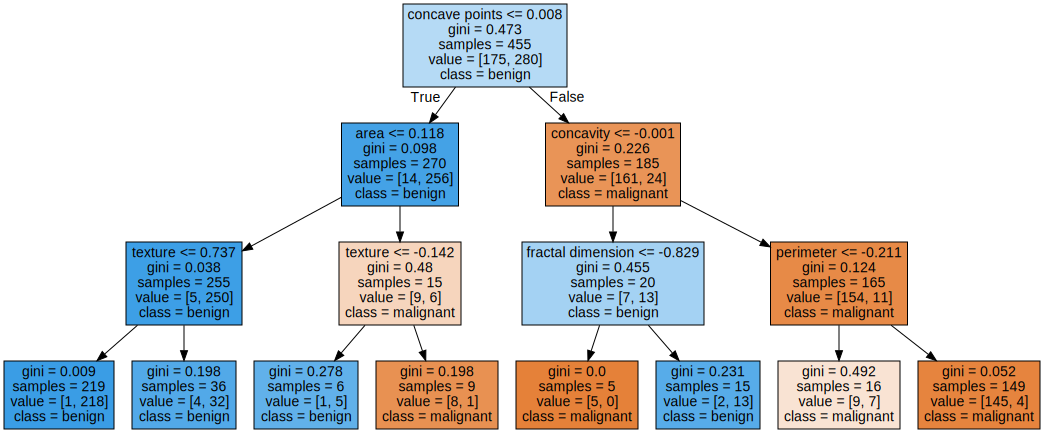

In [15]:
dot_data = export_graphviz(model, out_file=None, 
                                feature_names=dataset.feature_names,  
                                class_names=dataset.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [21]:
model.feature_importances_

array([0.        , 0.02426361, 0.02652585, 0.05195231, 0.        ,
       0.        , 0.06607999, 0.80051419, 0.        , 0.03066406])

In [17]:
dataset.feature_names

['radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'concavity',
 'concave points',
 'symmetry',
 'fractal dimension']

In [22]:
pd.DataFrame(model.feature_importances_, dataset.feature_names)

,0
radius,0.000000
texture,0.024264
perimeter,0.026526
area,0.051952
smoothness,0.000000
compactness,0.000000
concavity,0.066080
concave points,0.800514
symmetry,0.000000
fractal dimension,0.030664


#### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [24]:
# Create a LogisticRegression and fit the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Get the coefficients of the model
coefficients = lr.coef_[0]

In [28]:
abs(coefficients)

array([0.99812041, 1.33923435, 0.98461586, 1.23538428, 1.02810779,
       0.0954119 , 0.99001122, 1.28525081, 0.51253509, 0.39608643])